In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data=pd.read_csv('student.csv')

In [4]:
data.head()

Math  Reading  Writing
0    48       68       63
1    62       81       72
2    79       80       78
3    76       83       79
4    59       64       62

In [5]:
x1=data['Math'].values
x2=data['Reading'].values
y=data['Writing'].values

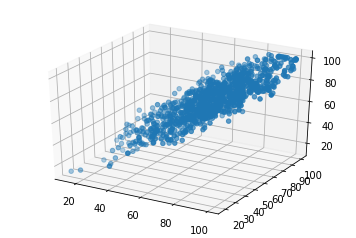

In [6]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1,x2,y)

In [7]:
x0=np.ones((1000,1))
alpha=0.0001
theta=np.concatenate((x0,x1.reshape(1000,1),x2.reshape(1000,1)),axis=1)
print(theta)
beta=np.random.rand(1,3)
print(beta)

[[  1.  48.  68.]
 [  1.  62.  81.]
 [  1.  79.  80.]
 ..., 
 [  1.  89.  87.]
 [  1.  83.  82.]
 [  1.  66.  66.]]
[[ 0.58578909  0.26983563  0.57641794]]


In [8]:
#y_pred

In [9]:
for i in range(10000):
    y_pred=np.dot(theta,beta.transpose())
    diff=y.reshape(1000,1)-y_pred
    derivative=-np.dot((2*diff).transpose(),theta)/1000
    #print(derivative)
    beta=beta-alpha*derivative
    cost_fn=np.sum(diff**2)/2*1000
print(beta)
print(cost_fn)

[[ 0.42920675  0.08709797  0.89309209]]
10527689.8624


# Using sklearn

In [16]:
from sklearn import datasets,linear_model
from sklearn.metrics import mean_squared_error
lm = linear_model.LinearRegression()
lm.fit(theta[:,1:],y.reshape(1000,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
y_pred = lm.predict(theta[:,1:])
print('Coefficients: \n', lm.coef_)
print('Intercept: \n', lm.intercept_)
print("Mean squared error: %.2f"
      % mean_squared_error(y.reshape(1000,1), y_pred))

Coefficients: 
 [[ 0.09600221  0.91049989]]
Intercept: 
 [-1.46243738]
Mean squared error: 20.91
